# ⚾ KBO Baseball Visualization

---
## [Part 1.  사전 데이터 이해]

### WAR(대체 선수 대비 승리 기여도)

WAR을 이해하기 위해 먼저 알아야할 대체 선수란 절대 팀내의 그 포지션의 후보 선수를 의미하는 게 아니다. 일반적인, 가상의 대체 선수 수준을 의미한다. 바로 이 대체 수준의 선수와 비교함으로써, WAR을 구하고자하는 선수가 득점과 실점 억제에 얼마나 기여했는지를 구하고, 이를 승수로 바꿔 표현하는 과정을 거치면 WAR가 산출된다.

#### 특징
WAR은 한 선수가 기록한 전 종목의 성적을 바탕으로 계산되며, 물론 선수의 포지션에 따라, 그리고 해당 년도의 상황까지도 포함한다. 리그와 구장에 의한 요소마저도 보정한다. 그래서 포지션에 상관없이 선수 비교가 가능해져 WAR을 자주 사용한다

#### 한계
전반적으로 타자의 WAR가 투수보다 수치가 더 높게 나온다. 

포지션에 따른 수비 WAR보정을 하는데 유격수는 7.5의 가중치를 주고 1루수는 –12.5를 사용하는데 이것이 합리적인가에 대한 의견도 있고, 불펜투수와 선발투수의 WAR 차이, 포수의 프레이밍이나 투수리드 능력, 주장으로 선수를 아우르는 팀 케미스트리 부분 또한 평가할 수 없는 한계를 지니고 있다. 그렇기 때문에 WAR을 믿지 않는 사람들도 있다

### OPS(출루율 + 장타율)

야구에서 타자들을 평가하는 스탯 중 하나로 타율만으로는 제대로 평가할 수 없는 타자들의 득점 생산력을 계산하기 위해 도입된 지표이다.


---
## [Part 2. 데이터 분석 : 연봉, WAR, OPS ]

## 1. 데이터 전처리

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

from pathlib import Path

In [10]:
data = pd.read_csv('~/aiffel/03.DS/2019_kbo_for_kaggle_v2.csv')
data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,3루수,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,우익수,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,우익수,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,3루수,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889


In [11]:
data.columns

Index(['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year',
       'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg',
       'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS'],
      dtype='object')

#### 결측치 확인

In [12]:
data.isnull().sum()

batter_name     0
age             0
G               0
PA              0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
TB              0
RBI             0
SB              0
CS              0
BB              0
HBP             0
GB              0
SO              0
GDP             0
BU              0
fly             0
year            0
salary          0
war             0
year_born       0
hand2           0
cp              0
tp              0
1B              0
FBP             0
avg            14
OBP            12
SLG            14
OPS            14
p_year          0
YAB             0
YOPS           15
dtype: int64

#### 결측값 있는 행 제거

In [13]:
data.dropna()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,3루수,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,우익수,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,우익수,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,3루수,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889


#### 필요없는 컬럼 제거

- year_born (선수 태어난 연도) : "age(나이)" 항목이 있어서 이 컬럼은 제거합니다.
- cp (최근 포지션) : 공식적인 포지션은 "tp(통합 포지션)" 이므로 이 컬럼은 제거합니다.
- avg(타율)은 통상적으로 "선수가 얼마나 잘하는지"를 나타내는 지표로 쓰이지 않으므로 제거합니다.

In [14]:
del data['year_born']
del data['cp']

In [15]:
data.head()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691


#### 각 칼럼별 상관계수 확인

In [41]:
data.corr()

,age,G,PA,AB,R,H,2B,3B,HR,TB,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
age,1.000000,0.290991,0.297580,0.295713,0.242221,0.300239,0.270430,-0.043416,0.265501,0.297933,...,0.227824,0.305743,0.152473,0.173237,0.184748,0.203347,0.468981,0.058478,0.158844,0.079511
G,0.290991,1.000000,0.931344,0.931434,0.850663,0.888407,0.820353,0.459975,0.610433,0.856016,...,0.511363,-0.017851,0.641826,0.429680,0.471757,0.368143,0.410868,0.239713,-0.202371,-0.092256
PA,0.297580,0.931344,1.000000,0.998311,0.942339,0.982147,0.917215,0.503878,0.715770,0.959638,...,0.548745,-0.006180,0.718900,0.483655,0.612981,0.427783,0.507936,0.297563,-0.223043,-0.074768
AB,0.295713,0.931434,0.998311,1.000000,0.938791,0.983531,0.919652,0.507860,0.708748,0.958860,...,0.542863,-0.003691,0.719471,0.479462,0.601838,0.424059,0.498850,0.293813,-0.218245,-0.071401
R,0.242221,0.850663,0.942339,0.938791,1.000000,0.957226,0.905705,0.557523,0.755356,0.956756,...,0.564174,0.045705,0.701243,0.481730,0.620929,0.411794,0.521936,0.360134,-0.288356,-0.111028
H,0.300239,0.888407,0.982147,0.983531,0.957226,1.000000,0.938045,0.510520,0.733638,0.978932,...,0.575400,0.029666,0.722042,0.490208,0.625101,0.432166,0.545821,0.334004,-0.272850,-0.099589
2B,0.270430,0.820353,0.917215,0.919652,0.905705,0.938045,1.000000,0.447042,0.727024,0.943021,...,0.559959,0.026597,0.688087,0.476862,0.605098,0.421370,0.509490,0.318704,-0.266338,-0.096634
3B,-0.043416,0.459975,0.503878,0.507860,0.557523,0.510520,0.447042,1.000000,0.165623,0.464119,...,0.255600,-0.053743,0.387613,0.210115,0.201536,0.097988,0.078733,0.133570,-0.234688,-0.104530
HR,0.265501,0.610433,0.715770,0.708748,0.755356,0.733638,0.727024,0.165623,1.000000,0.852437,...,0.540203,0.060351,0.561271,0.471787,0.572332,0.420812,0.570141,0.397784,-0.244555,-0.090033
TB,0.297933,0.856016,0.959638,0.958860,0.956756,0.978932,0.943021,0.464119,0.852437,1.000000,...,0.599754,0.037583,0.718364,0.514093,0.648794,0.455122,0.578890,0.373292,-0.288211,-0.106273


Text(0.5, 1.0, 'Hit Corr')

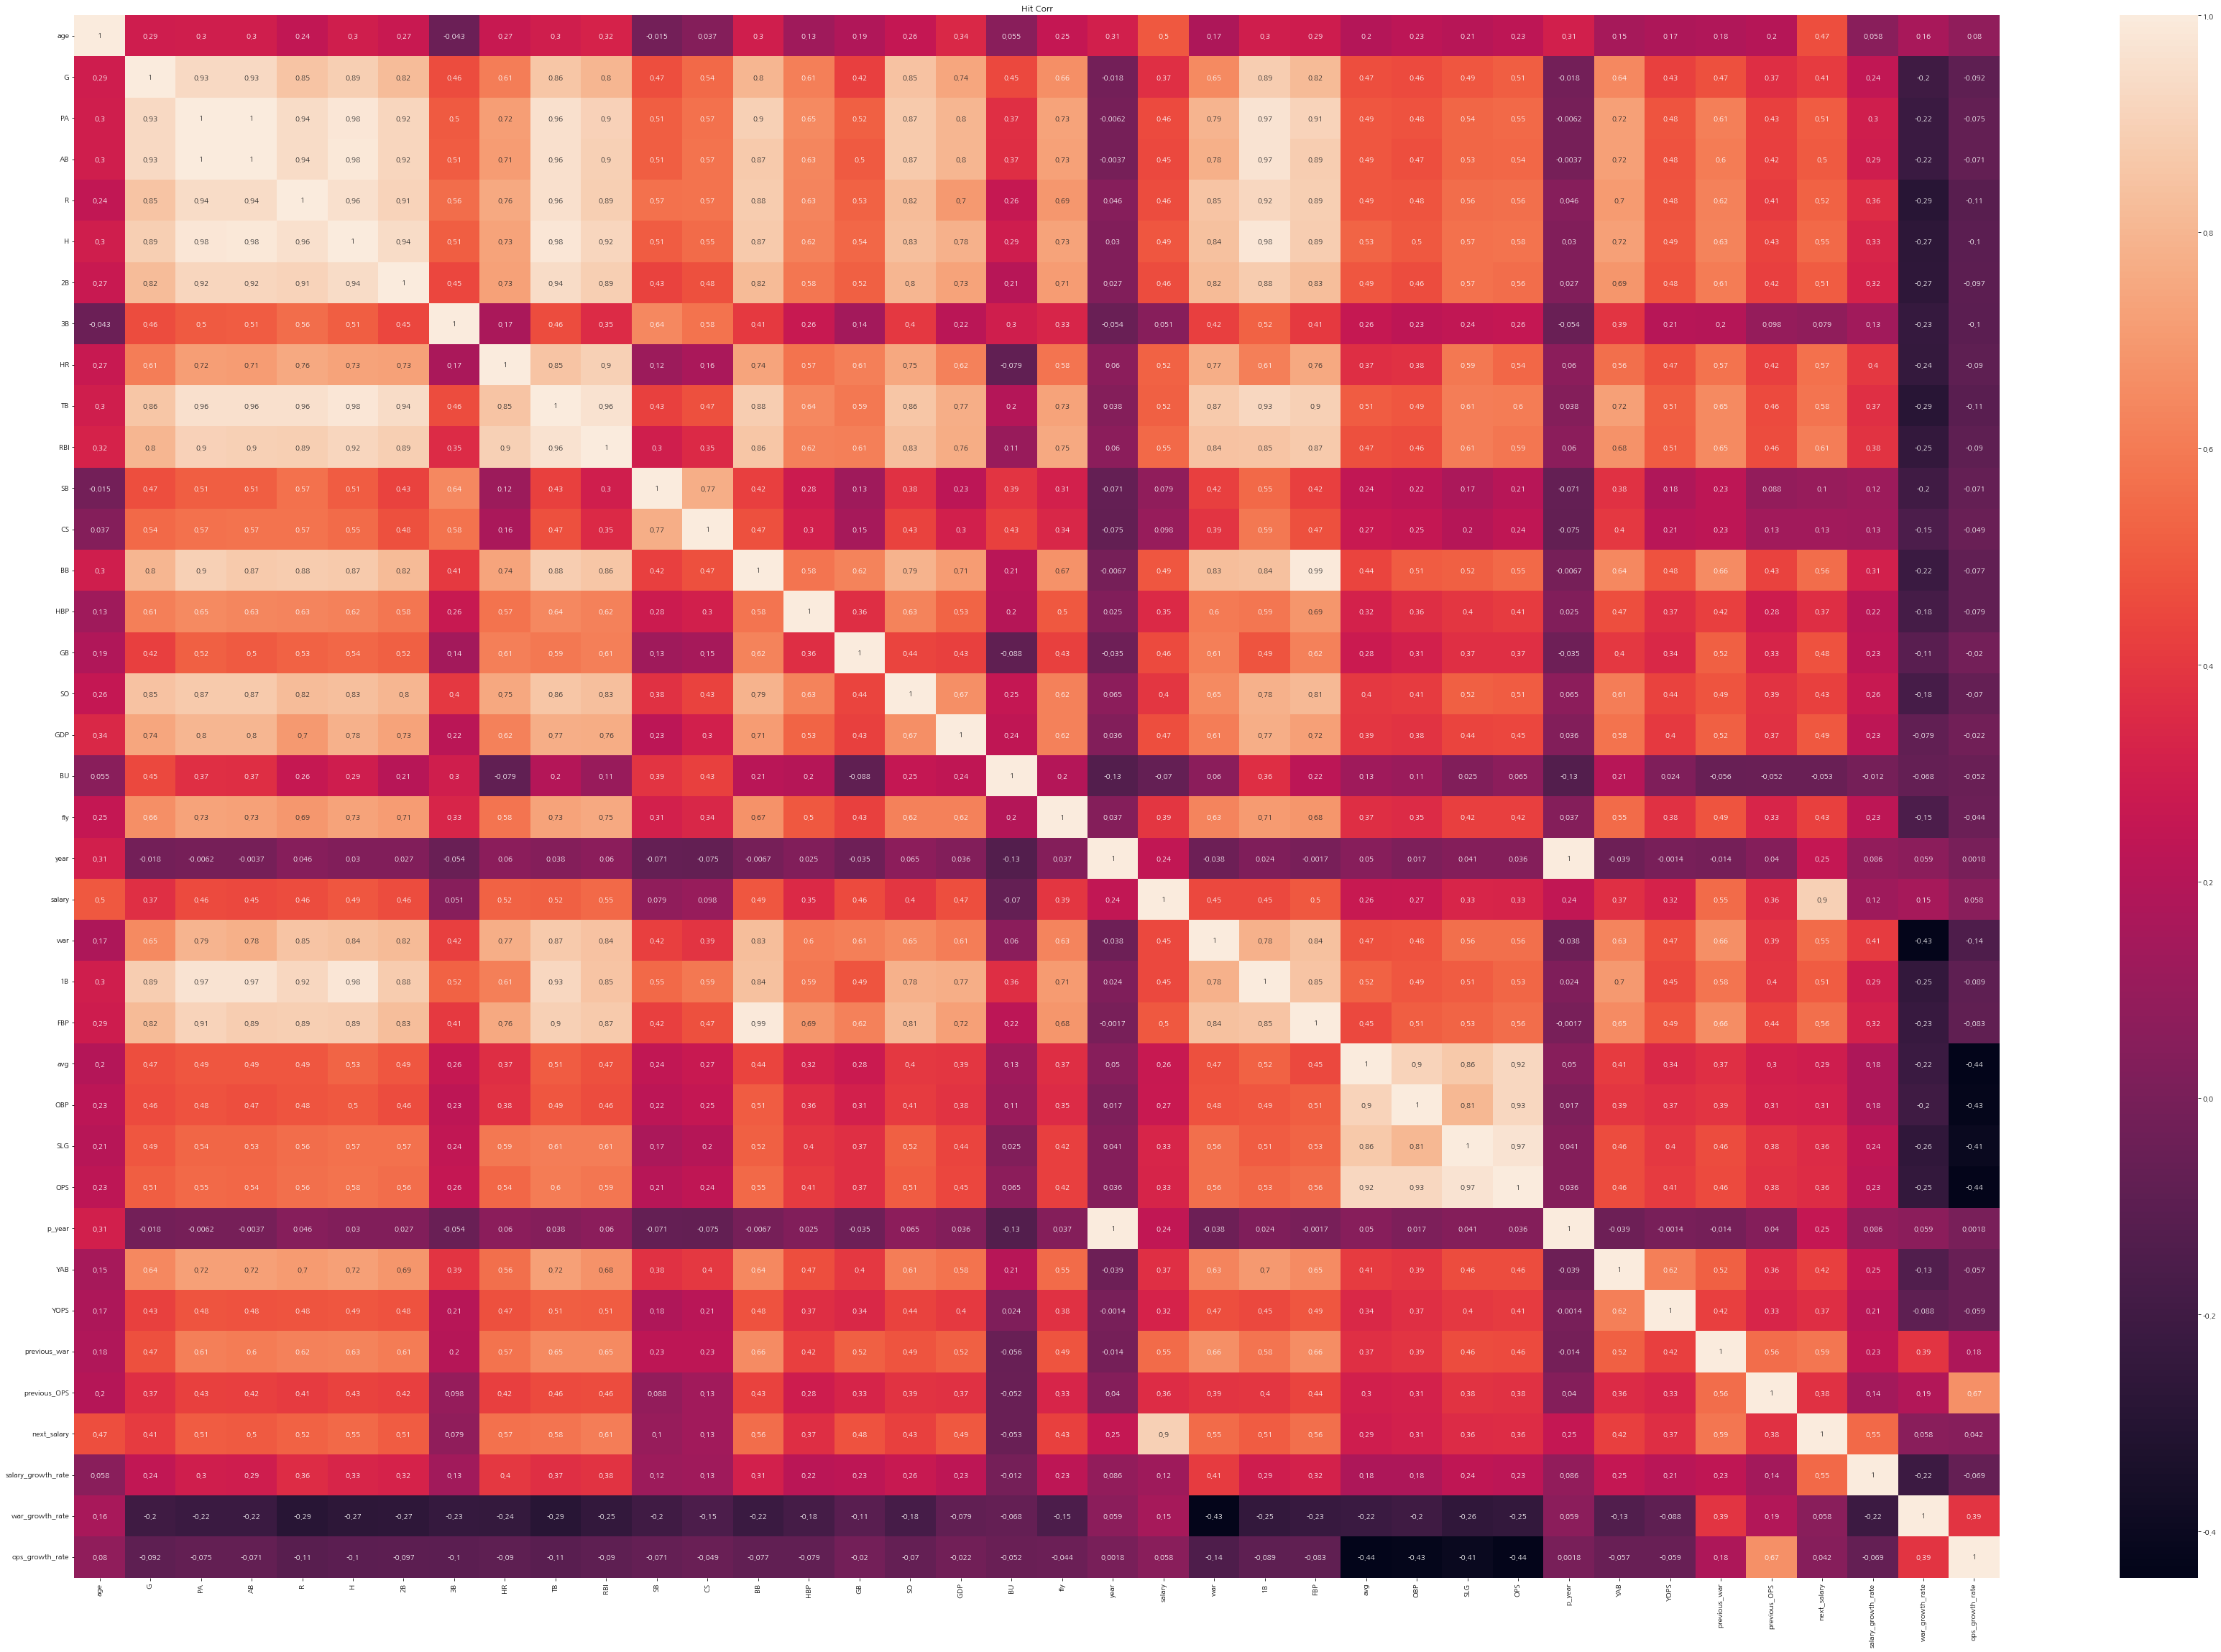

In [53]:
plt.figure(figsize=(60,40))
sns.heatmap(data.corr(),annot=True)
plt.title('Hit Corr')


---

## 2. 포지션 별 보는 연봉-WAR/OPS 상관관계

### 2-1. 포지션 종류

In [16]:
counts = data['tp'].value_counts()
counts

좌익수     259
포수      247
유격수     238
2루수     234
중견수     232
우익수     230
3루수     213
1루수     187
지명타자     73
Name: tp, dtype: int64

In [17]:
positions = counts.index
positions

Index(['좌익수', '포수', '유격수', '2루수', '중견수', '우익수', '3루수', '1루수', '지명타자'], dtype='object')

좌익수가 가장 많고, 지명타자가 가장 적습니다.

### 2-2. 포지션 별 salary 분포

<AxesSubplot:xlabel='tp', ylabel='salary'>

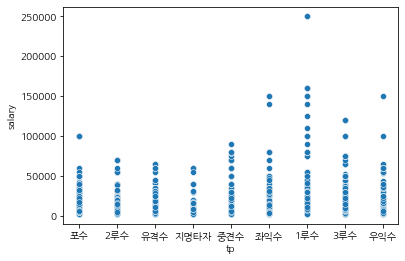

In [18]:
import matplotlib
matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

sns.scatterplot(x = data['tp'], y = data['salary'])

선수가 적은 축에 속한 1루수 선수들이 비교적 높은 연봉을 받고 있음을 알 수 있습니다.

### 2-3. 년도별 연봉 평균 

In [19]:
mean_salary = data[['year', 'tp', 'salary']].groupby(['year', 'tp']).mean()
mean_salary = mean_salary.reset_index()
mean_salary

,year,tp,salary
0,1990,1루수,2400.000000
1,1990,2루수,2400.000000
2,1990,우익수,2400.000000
3,1990,좌익수,2400.000000
4,1990,중견수,2400.000000
...,...,...,...
219,2018,유격수,15154.545455
220,2018,좌익수,20586.666667
221,2018,중견수,16457.894737
222,2018,지명타자,19442.857143


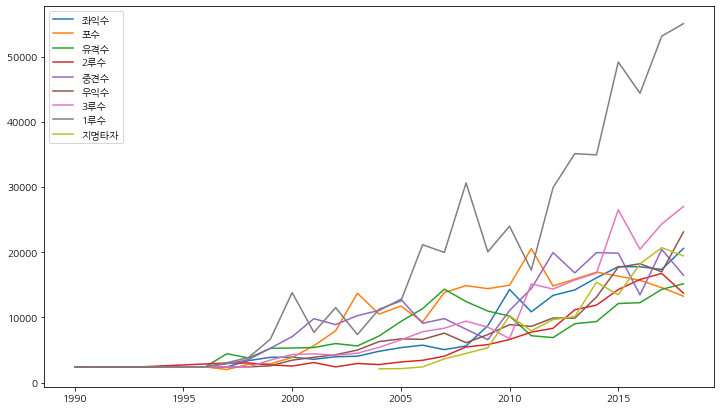

In [20]:
plt.figure(figsize=(12, 7))

for p in positions:
    d = mean_salary[mean_salary['tp'] == p]
    plt.plot(d['year'], d['salary'], label=p)
    
plt.legend()
plt.show()

연봉이 포지션 별로 큰 차이를 가지고 있음을 알 수 있습니다.

따라서 포지션 별 연봉 상관관계를 살펴보면 다음과 같습니다.

### 2-4. 포지션 별 연봉-war/OPS 상관관계 

<Figure size 1296x2160 with 0 Axes>

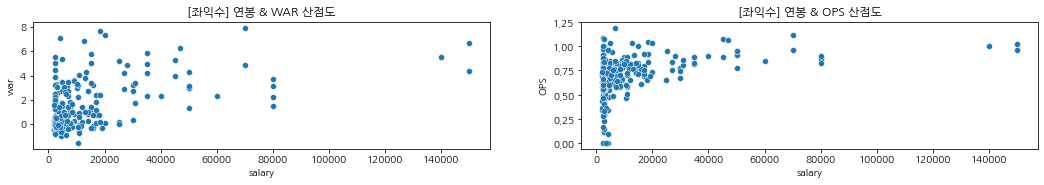

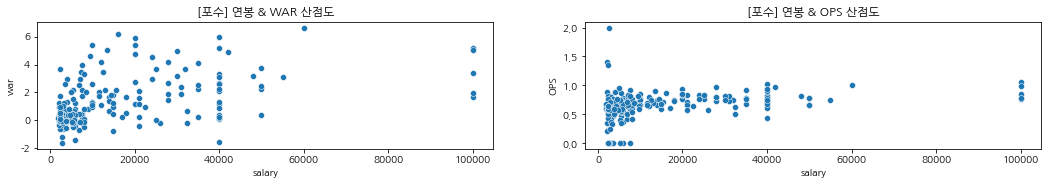

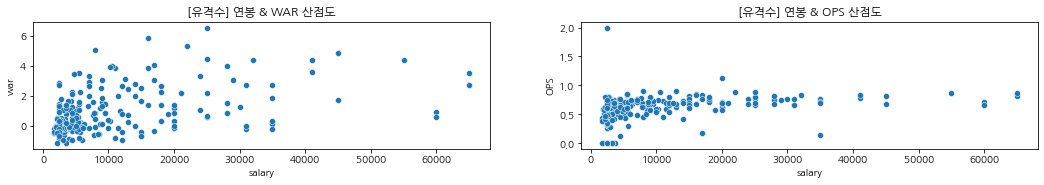

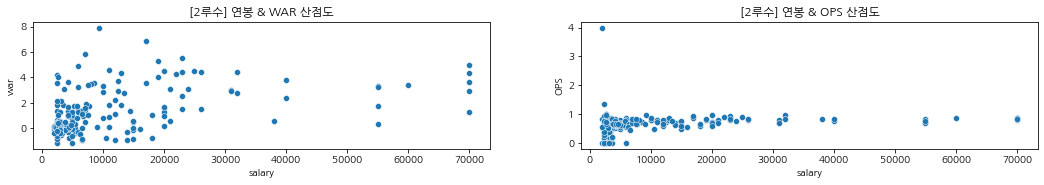

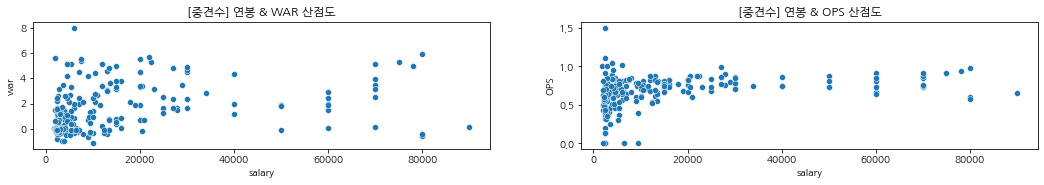

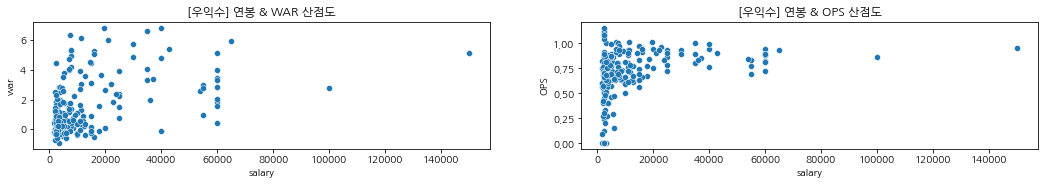

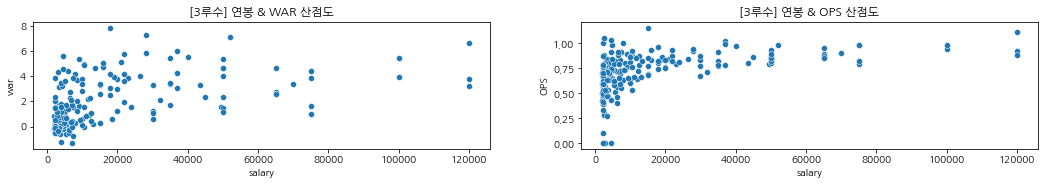

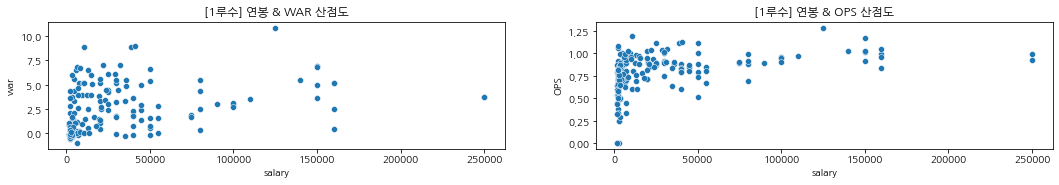

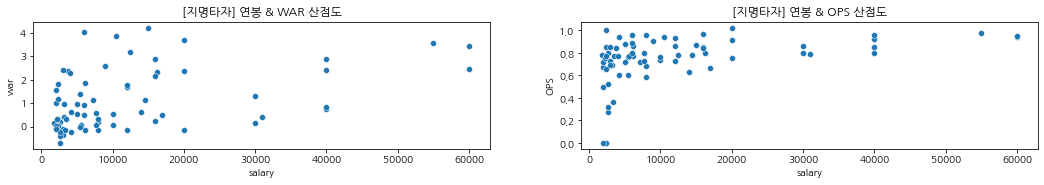

In [21]:
plt.figure(figsize=(18, 30))

for idx, p in enumerate(positions):
    d = data.copy()
    d = d[d['tp'] == p] # 해당 포지션만 분석
    
    plt.figure(figsize=(18, 50))
    plt.subplot(18, 2, idx*2+1)
    plt.title('[' + p + '] 연봉 & WAR 산점도')
    sns.scatterplot(x = d['salary'], y = d['war'])
#     sns.regplot(x='salary', y='war', data=d)
    plt.xlabel('salary')
    plt.ylabel('war')

    plt.subplot(18, 2, idx*2+2)
    plt.title('[' + p + '] 연봉 & OPS 산점도')
    sns.scatterplot(x = d['salary'], y = d['OPS'])
#     sns.regplot(x='salary', y='OPS', data=d)
    plt.xlabel('salary')
    plt.ylabel('OPS')
    
plt.show()

##### 포지션 별 상관관계를 보아도 크게 두드러진 점을 볼 수 없었습니다.

---

## 3. 상승률로 보는 연봉-WAR/OPS 상관관계


### 3-1. 전년도 WAR, OPS와 내년 연봉 데이터 채우기

In [22]:
for idx, name in zip(data.index, data.batter_name):
    if idx == 0:
        continue

    previous_name = data.at[idx-1, 'batter_name']
    if name != previous_name:
        continue

    previous_war = data.at[idx-1, 'war']
    data.at[idx, 'previous_war'] = previous_war
    previous_OPS = data.at[idx-1, 'OPS']
    data.at[idx, 'previous_OPS'] = previous_OPS

In [23]:
data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS,previous_war,previous_OPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580,NaN,NaN
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784,-0.055,0.509
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581,-0.441,0.580
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476,0.783,0.784
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691,-0.405,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768,1.102,0.773
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154,NaN,NaN
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720,0.215,0.684
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889,NaN,NaN


In [24]:
for idx, name in zip(data.index, data.batter_name):
    if len(data) == idx+1:
        break
        
    next_name = data.at[idx+1, 'batter_name']
    if name != next_name:
        continue
        
    next_salary = data.at[idx+1, 'salary']
    data.at[idx, 'next_salary'] = next_salary

In [25]:
data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,avg,OBP,SLG,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,0.173,0.259,0.250,0.509,2014,79.0,0.580,NaN,NaN,2900.0
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,0.177,0.226,0.354,0.580,2015,154.0,0.784,-0.055,0.509,6000.0
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,0.234,0.316,0.468,0.784,2016,174.0,0.581,-0.441,0.580,6000.0
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,0.195,0.276,0.305,0.581,2017,17.0,0.476,0.783,0.784,5500.0
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,0.176,0.300,0.176,0.476,2018,47.0,0.691,-0.405,0.581,5300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,0.301,0.374,0.493,0.867,2019,395.0,0.768,1.102,0.773,NaN
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,0.272,0.365,0.319,0.684,2018,13.0,0.154,NaN,NaN,6200.0
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,0.077,0.077,0.077,0.154,2019,188.0,0.720,0.215,0.684,NaN
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,0.312,0.344,0.505,0.849,2016,523.0,0.889,NaN,NaN,50000.0


### 3-2. 연봉, war, OPS 상승률 계산

- 연봉 : 올해 대비 내년 상승률 
- 연봉 책정 기준이 되는 war, OPS : 작년 대비 올해 상승률

In [26]:
salary_growth = data.apply(lambda d : (d['next_salary'] - d['salary']) / 100, axis=1)
data.loc[:, 'salary_growth_rate'] = salary_growth

war_growth = data.apply(lambda d : d['previous_war'] - d['war'], axis=1)
data.loc[:, 'war_growth_rate'] = war_growth

ops_growth = data.apply(lambda d : d['previous_OPS'] - d['OPS'], axis=1)
data.loc[:, 'ops_growth_rate'] = ops_growth

data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,0.509,2014,79.0,0.580,NaN,NaN,2900.0,4.0,NaN,NaN
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,0.580,2015,154.0,0.784,-0.055,0.509,6000.0,31.0,0.386,-0.071
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,0.784,2016,174.0,0.581,-0.441,0.580,6000.0,0.0,-1.224,-0.204
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,0.581,2017,17.0,0.476,0.783,0.784,5500.0,-5.0,1.188,0.203
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,0.476,2018,47.0,0.691,-0.405,0.581,5300.0,-2.0,-0.275,0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,0.867,2019,395.0,0.768,1.102,0.773,NaN,NaN,-2.213,-0.094
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,0.684,2018,13.0,0.154,NaN,NaN,6200.0,31.0,NaN,NaN
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,0.154,2019,188.0,0.720,0.215,0.684,NaN,NaN,0.486,0.530
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,0.849,2016,523.0,0.889,NaN,NaN,50000.0,0.0,NaN,NaN


### 3-3. 상승률이 가장 높은 사람은 어떤 선수일까?

In [27]:
data['salary_growth_rate'].max()

2110.0

In [28]:
data[data['salary_growth_rate'] == 2110]

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
1337,이대호,28.0,127.0,552.0,478.0,99.0,174.0,13.0,0.0,44.0,...,1.111,2011,493.0,1.011,4.836,0.908,250000.0,2110.0,-3.989,-0.203


2011년에 이대호 선수의 연봉 상승률이 2110%로 가장 높습니다. 

### 3-4. 상승률이 0인 선수들도 있을까?

In [29]:
data[data['salary_growth_rate'] == 0]

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,0.784,2016,174.0,0.581,-0.441,0.580,6000.0,0.0,-1.224,-0.204
7,김민식,26.0,23.0,26.0,24.0,4.0,4.0,0.0,0.0,0.0,...,0.398,2016,144.0,0.720,NaN,NaN,3000.0,0.0,NaN,NaN
8,김민식,27.0,88.0,170.0,144.0,17.0,37.0,9.0,0.0,2.0,...,0.720,2017,352.0,0.576,-0.187,0.398,3000.0,0.0,-0.916,-0.322
14,황윤호,22.0,10.0,6.0,5.0,2.0,0.0,0.0,0.0,0.0,...,0.167,2016,12.0,0.166,NaN,NaN,2700.0,0.0,NaN,NaN
36,이창진,23.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,...,1.500,2015,19.0,0.411,NaN,NaN,2400.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,이승엽,37.0,111.0,483.0,443.0,62.0,112.0,24.0,0.0,13.0,...,0.693,2014,506.0,0.915,5.469,0.886,80000.0,0.0,5.098,0.193
1895,이승엽,39.0,122.0,522.0,470.0,87.0,156.0,28.0,1.0,26.0,...,0.949,2016,542.0,0.898,2.464,0.915,100000.0,0.0,-0.692,-0.034
1900,이원석,22.0,53.0,134.0,120.0,14.0,33.0,7.0,0.0,0.0,...,0.653,2009,376.0,0.794,0.709,0.615,6800.0,0.0,0.315,-0.038
1907,이원석,31.0,121.0,459.0,411.0,55.0,109.0,20.0,1.0,18.0,...,0.773,2018,479.0,0.867,0.311,1.153,30000.0,0.0,-0.791,0.380


### 3-5. 연봉 상승률과 war, ops의 상관관계

- 상관관계를 보여주도록 NaN인 row는 빼고 상관관계를 살펴보겠습니다.
- previous_war과 next_salary 기준으로 NaN인 행을 제거

In [30]:
data_correlation = data.copy()
data_correlation = data_correlation[pd.notna(data_correlation['previous_war'])]
data_correlation = data_correlation[pd.notna(data_correlation['next_salary'])]
data_correlation = data_correlation.reset_index()
data_correlation

,index,batter_name,age,G,PA,AB,R,H,2B,3B,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
0,1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,...,0.580,2015,154.0,0.784,-0.055,0.509,6000.0,31.0,0.386,-0.071
1,2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,...,0.784,2016,174.0,0.581,-0.441,0.580,6000.0,0.0,-1.224,-0.204
2,3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,...,0.581,2017,17.0,0.476,0.783,0.784,5500.0,-5.0,1.188,0.203
3,4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,...,0.476,2018,47.0,0.691,-0.405,0.581,5300.0,-2.0,-0.275,0.105
4,8,김민식,27.0,88.0,170.0,144.0,17.0,37.0,9.0,0.0,...,0.720,2017,352.0,0.576,-0.187,0.398,3000.0,0.0,-0.916,-0.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1903,이원석,25.0,110.0,311.0,264.0,36.0,57.0,11.0,0.0,...,0.646,2012,325.0,0.731,1.517,0.760,8400.0,-10.0,0.974,0.114
1307,1904,이원석,26.0,107.0,372.0,325.0,36.0,87.0,13.0,2.0,...,0.731,2013,264.0,0.858,0.543,0.646,10000.0,16.0,-1.513,-0.085
1308,1905,이원석,27.0,85.0,300.0,264.0,40.0,83.0,12.0,0.0,...,0.858,2014,231.0,0.676,2.056,0.731,15000.0,50.0,-0.754,-0.127
1309,1906,이원석,30.0,7.0,22.0,19.0,3.0,6.0,3.0,0.0,...,1.153,2017,411.0,0.773,2.810,0.858,30000.0,150.0,2.499,-0.295


#### 연봉 상승률 대비 war, ops의 상관관계

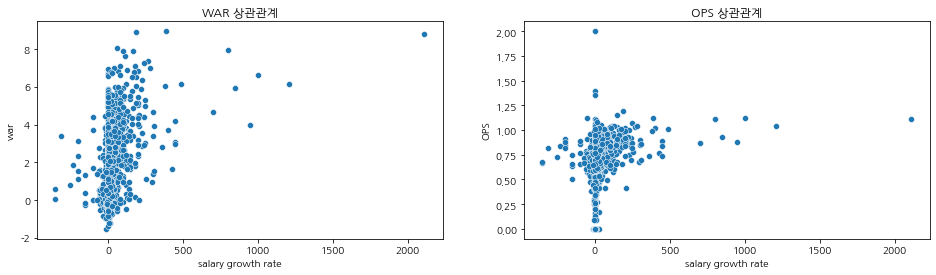

In [31]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('WAR 상관관계')
sns.scatterplot(x = data_correlation['salary_growth_rate'], y = data_correlation['war'])
plt.xlabel('salary growth rate')
plt.ylabel('war')

plt.subplot(122)
plt.title('OPS 상관관계')
sns.scatterplot(x = data_correlation['salary_growth_rate'], y = data_correlation['OPS'])
plt.xlabel('salary growth rate')
plt.ylabel('OPS')
plt.show()

### 3-6. 연봉 상승률과 war, ops 상승률의 상관관계

#### 연봉 상승률 대비 war, ops 상승률의 상관관계

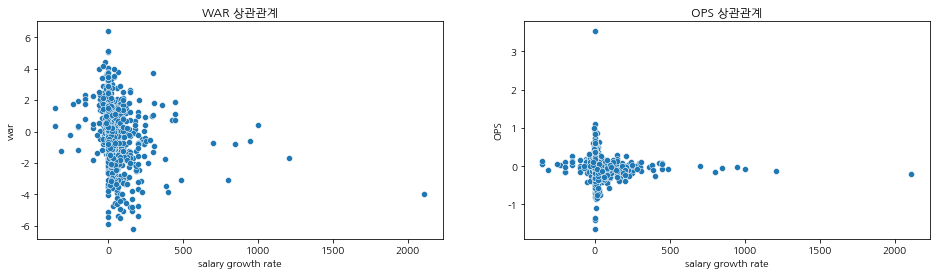

In [32]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('WAR 상관관계')
sns.scatterplot(x = data_correlation['salary_growth_rate'], y = data_correlation['war_growth_rate'])
plt.xlabel('salary growth rate')
plt.ylabel('war')

plt.subplot(122)
plt.title('OPS 상관관계')
sns.scatterplot(x = data_correlation['salary_growth_rate'], y = data_correlation['ops_growth_rate'])
plt.xlabel('salary growth rate')
plt.ylabel('OPS')
plt.show()

### 3-7. 포지션 별 연봉 상승률과 war, ops 상승률의 선형회귀

<Figure size 1296x2160 with 0 Axes>

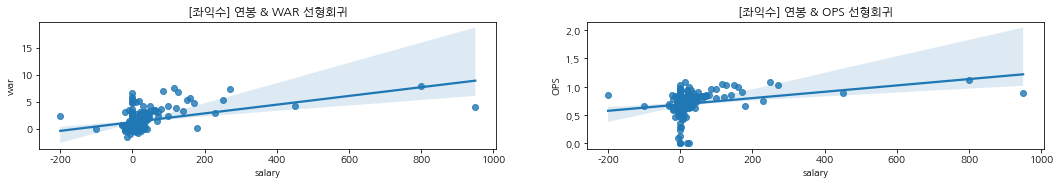

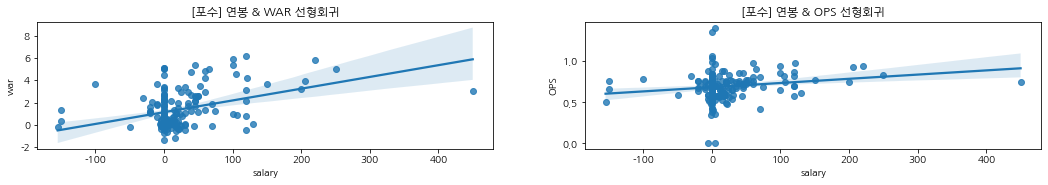

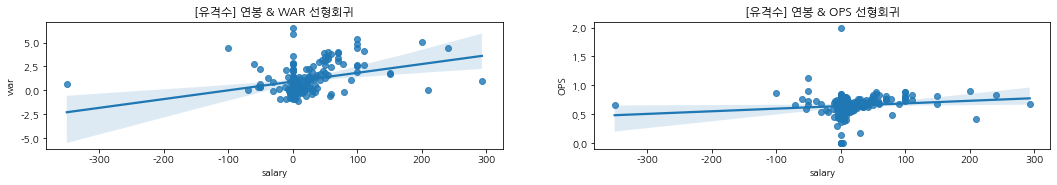

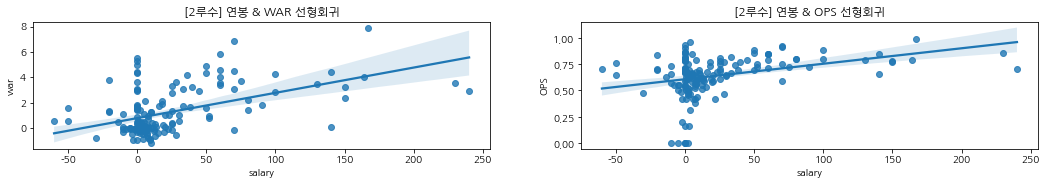

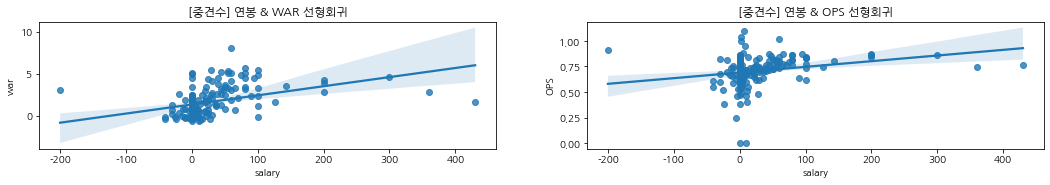

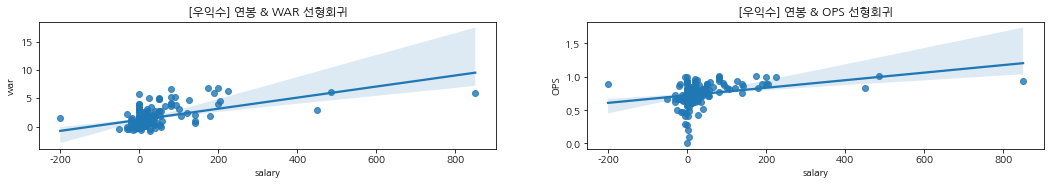

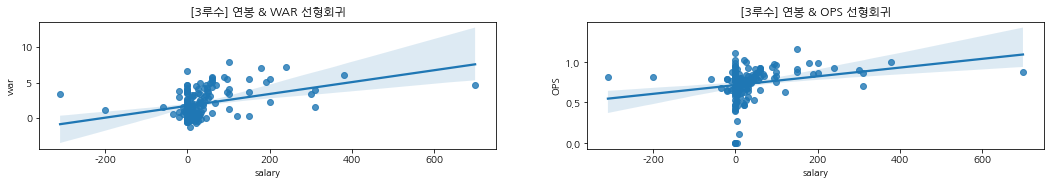

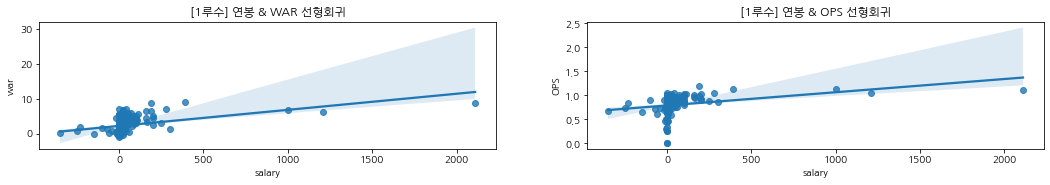

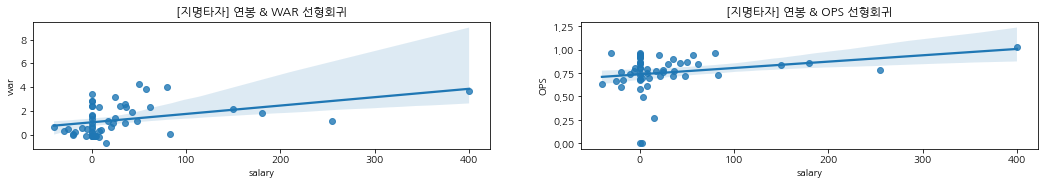

In [33]:
plt.figure(figsize=(18, 30))

for idx, p in enumerate(positions):
    d = data_correlation.copy()
    d = d[d['tp'] == p] # 해당 포지션만 분석
    
    plt.figure(figsize=(18, 50))
    plt.subplot(18, 2, idx*2+1)
    plt.title('[' + p + '] 연봉 & WAR 선형회귀')
    sns.regplot(x='salary_growth_rate', y='war', data=d)
    plt.xlabel('salary')
    plt.ylabel('war')

    plt.subplot(18, 2, idx*2+2)
    plt.title('[' + p + '] 연봉 & OPS 선형회귀')
    sns.regplot(x='salary_growth_rate', y='OPS', data=d)
    plt.xlabel('salary')
    plt.ylabel('OPS')
    
plt.show()

연봉 상승률, 더 나아가 war, ops 상승률로도 확실한 상관관계를 확인하기 어려웠습니다.

이유를 찾아봤을 때, 연봉 책정이 war나 ops외에 복합적인 다른 요소들로 영향을 받고 있기 때문인데요, 

구단 안에 있는 동안에는 성과에 상관없이 고정적으로 연봉이 책정된다는 부분이 가장 큰 것으로 보입니다. 

7년동안 1군에 있어야 FA 계약 기준으로 성과 대비 연봉을 측정할 수 있을거라 가정하여

FA 계약 이후 선수들의 연봉 책정이 어떻게 되는지 살펴보겠습니다.

---

## 4. FA 계약 시점 기준으로 연봉 상관관계 분석

- 데이터 출처 : https://www.koreabaseball.com/Player/Trade.aspx
- KBO 데이터가 2017~2022년만 있기 때문에, 원본 데이터와 겹치는 기간인 2017, 18년 데이터만 가지고 적용해보겠습니다.

### 4-1. FA 계약 선수들만 데이터 필터링

In [34]:
batter_fa_2017 = ('손시헌', '이종욱', '지석훈', '정의윤', '민병헌', '손아섭', '강민호', '문규현')
batter_fa_2018 = ('양의지', '이재원', '최정', '모창민', '최준석', '이대형', '정근우', '김주찬', '채태인')

In [35]:
data_fa = data.copy()

#### 2017년 FA

In [36]:
data_fa_2017 = data.copy()
data_fa_2017 = data_fa_2017[data_fa_2017['year'] == 2017] # 2017년 기준
    
data_fa_2017 = data_fa_2017[data_fa_2017['batter_name'].isin(batter_fa_2017)] # fa_2017에 속한 사람들만 확인

data_fa_2017

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
426,정의윤,31.0,112.0,381.0,349.0,44.0,112.0,16.0,0.0,15.0,...,0.863,2018,217.0,0.800,1.791,0.857,30000.0,0.0,0.489,-0.006
815,지석훈,33.0,121.0,304.0,268.0,29.0,64.0,16.0,0.0,6.0,...,0.684,2018,94.0,0.472,-0.942,0.614,15000.0,1.0,-1.387,-0.070
961,강민호,32.0,130.0,515.0,456.0,62.0,130.0,22.0,1.0,22.0,...,0.843,2018,427.0,0.788,5.024,0.982,100000.0,0.0,1.641,0.139
1372,민병헌,30.0,123.0,520.0,447.0,73.0,136.0,21.0,0.0,14.0,...,0.834,2018,443.0,0.855,4.038,0.891,100000.0,450.0,1.086,0.057
1412,손아섭,29.0,144.0,667.0,576.0,113.0,193.0,35.0,4.0,20.0,...,0.934,2018,553.0,0.950,5.150,0.886,150000.0,850.0,-0.799,-0.048
1465,문규현,34.0,110.0,337.0,304.0,38.0,82.0,15.0,2.0,6.0,...,0.686,2018,316.0,0.708,1.070,0.675,18000.0,60.0,1.472,-0.011


#### 2018년 FA

In [37]:
data_fa_2018 = data.copy()
data_fa_2018 = data_fa_2018[data_fa_2018['year'] == 2018] # 2018년 기준
    
data_fa_2018 = data_fa_2018[data_fa_2018['batter_name'].isin(batter_fa_2018)] # fa_2018에 속한 사람들만 확인

data_fa_2018

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
53,김주찬,37.0,121.0,471.0,429.0,71.0,146.0,23.0,0.0,18.0,...,0.895,2019,337.0,0.714,2.342,0.848,NaN,NaN,0.014,-0.047
501,최정,31.0,115.0,489.0,406.0,95.0,99.0,16.0,1.0,35.0,...,0.915,2019,503.0,0.918,6.680,1.111,NaN,NaN,2.876,0.196
550,이재원,30.0,130.0,471.0,407.0,63.0,134.0,24.0,0.0,17.0,...,0.919,2019,451.0,0.717,0.222,0.668,NaN,NaN,-3.912,-0.251
583,정근우,36.0,102.0,425.0,375.0,63.0,114.0,24.0,1.0,11.0,...,0.838,2019,277.0,0.688,2.884,0.863,NaN,NaN,1.611,0.025
782,양의지,31.0,133.0,503.0,439.0,84.0,157.0,29.0,1.0,23.0,...,1.012,2019,390.0,1.012,3.162,0.814,NaN,NaN,-3.481,-0.198
825,모창민,33.0,81.0,314.0,287.0,38.0,80.0,10.0,1.0,17.0,...,0.826,2019,341.0,0.824,2.207,0.846,NaN,NaN,1.637,0.020
1351,채태인,36.0,130.0,420.0,376.0,44.0,110.0,18.0,0.0,15.0,...,0.816,2019,167.0,0.709,1.684,0.888,NaN,NaN,1.246,0.072


2017년, 2018년 데이터를 병합합니다.

In [38]:
data_fa_1718 = pd.concat([data_fa_2017, data_fa_2018])

### 4-2. FA 계약 선수 연봉 상관관계 (2017~2018)

#### 2017, 2018년 FA 선수들 연봉과 war, ops 상관관계

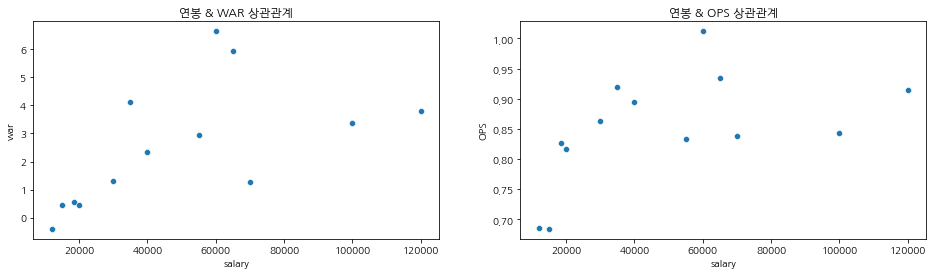

In [39]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('연봉 & WAR 상관관계')
sns.scatterplot(x = data_fa_1718['salary'], y = data_fa_1718['war'])
plt.xlabel('salary')
plt.ylabel('war')

plt.subplot(122)
plt.title('연봉 & OPS 상관관계')
sns.scatterplot(x = data_fa_1718['salary'], y = data_fa_1718['OPS'])
plt.xlabel('salary')
plt.ylabel('OPS')
plt.show()

#### 선형회귀로 보는 상관관계

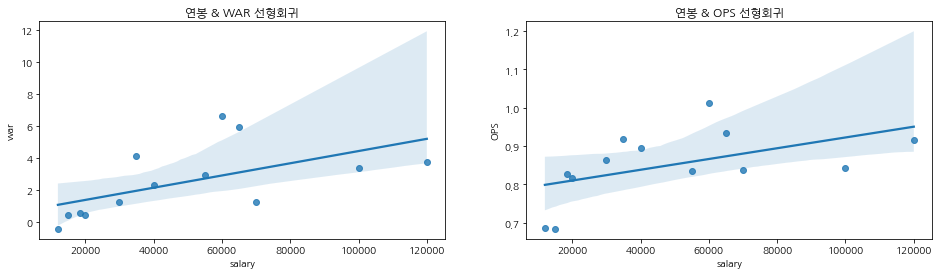

In [40]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('연봉 & WAR 선형회귀')
sns.regplot(x='salary', y='war', data=data_fa_1718)
plt.xlabel('salary')
plt.ylabel('war')

plt.subplot(122)
plt.title('연봉 & OPS 선형회귀')
sns.regplot(x='salary', y='OPS', data=data_fa_1718)
plt.xlabel('salary')
plt.ylabel('OPS')
plt.show()

FA 계약 시점으로 데이터를 살펴봤을 때

이전 상관관계들보다 **연봉**과 **war, OPS**간 상관관계가 다소 있어 보입니다.

다만, FA 계약데이터(외부데이터)가 너무 적어서 많은 데이터 분포를 파악할 수 없고

이로 인해 상관관계 근거로 쓰이기에 부족하다 판단되어 아쉬웠습니다.

---

## [Part 3. 데이터 분석 : 좌타자, 우타자]

## 5. 좌타자 우타자 연봉 비교

야구계에서는 좌타자가 우타자에 비해 1루에 가깝게 서 있어 진루에 유리하고, 투수들도 좌타자를 더 까다로워 한다는 속설이 있다. 그렇다면 좌타자는 우타자보다 연봉을 많이 받을까?

먼저 좌타자와 우타자의 연봉을 비교해 보기로 했다.

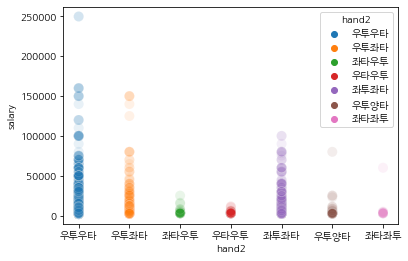

In [44]:
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import platform

# Scatter plot by Groups
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.scatterplot(x='hand2', 

                y='salary', 

                hue='hand2', # different colors by group

                s=100, # marker size
                
                alpha = 0.1,

                data=data)

plt.show()

해당 그래프로는 좌타자와 우타자의 연봉 차이가 명확히 보이지 않았다. 따라서 우투우타, 우타우투는 우타자, 나머지는 좌타자, (양손타자는 별개로 인덱싱)로 인덱싱하는 컬럼을 추가한 뒤 각각의 연봉 평균을 비교해보기로 했다.

#### 칼럼 추가하기(right_hand 칼럼 추가)
우타자는 우타자끼리, 좌타자는 좌타자끼리 나누었다. 양타자는 따로 인덱싱해 주었다.

In [46]:
#우투우타, 우타우투 = 1, 나머지 = 0로 인덱싱(우타 = 1, 좌타 = 0)
data['Right_hand'] = (data['hand2']=='우투우타') | (data['hand2']=='우타우투') #만약 우투우타 혹은 우타우투면 true, 나머지는 false로 인덱싱
data["Right_hand"] = data["Right_hand"].astype(np.int64) #t/f값을 1/0값으로 변경

#양타 = 2
data.loc[data['hand2'] == '우투양타', 'Right_hand'] = 2 #만약 hand2 == 우투양타, right_hand = 2로 변경

data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS,Right_hand
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580,1
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784,1
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581,1
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476,1
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768,1
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154,0
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720,0
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889,1


In [47]:
# 좌타자와 우타자, 그리고 양타자 수 비교
data['Right_hand'].value_counts()

1    1247
0     625
2      41
Name: Right_hand, dtype: int64

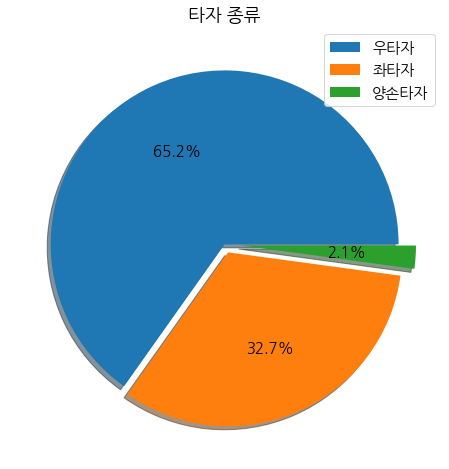

In [48]:
#시각화
temp = data['Right_hand'].value_counts()
counts = []
for i in temp:
    counts.append(i)

explode = [0, 0.05, 0.1]

plt.figure(figsize = (8,8))
plt.rc('font', size=15)
plt.pie(counts, autopct='%.1f%%', explode = explode, shadow=True)
plt.legend(['우타자','좌타자','양손타자'])
plt.title('타자 종류')
plt.show()

보다시피 1(우타자)가 0(좌타자)보다 2배 가량 많은 것으로 보인다. 또 양손을 다 쓸 수 있는 양타자는 37명으로, 매우 극소수로 파악되었다.

좌타자가 KBO계에서 적은 편에 속한다는 사실을 알 수 있었다. 투수들이 좌타자를 까다로워하는 이유도 상대적으로 좌타자를 마주칠 경험이 적기 때문인 것으로 사려된다.

이제 우타자와 좌타자, 양타자의 연봉 평균을 비교해 보자

In [49]:
data_salary = data.groupby(['Right_hand'], as_index=False).mean()
data_salary['salary']

0    14523.912000
1    14130.128308
2     7287.804878
Name: salary, dtype: float64

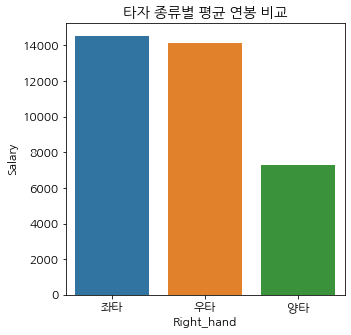

In [51]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  data_salary["salary"])
plt.title('타자 종류별 평균 연봉 비교')
plt.xlabel('Right_hand')
plt.ylabel('Salary')
plt.show()


좌타자와 우타자의 연봉 평균을 내 보았다.

좌타자가 우타자에 비해 조금 더 높은 평균 연봉을 가지는 것을 알 수 있었다. 그러나 큰 차이는 발견되지 않았다.

양손타자는 그 활용도만 보면 굉장히 높은 연봉을 받아야할 것 같은데 상대적으로 적은 연봉 평균치를 보였다. 


#### 가설 : 양손타자는 과거에 많이 존재했기 때문에, 물가가 상대적으로 낮은 시기에 연봉이 정해져 평균 연봉이 낮게 책정된다.
혹시나 양손타자(스위치히터)들의 활동기간이 일러서, 낮은 물가 때문에 연봉 평균이 낮은가? 확인해보자

In [53]:
#(양타자들 연도 최솟값, 최댓값 파악 코드)
data_both = data[['year','Right_hand']] # 원 데이터에서 필요한 데이터 열만 가져오기

idx = data[(data['Right_hand'] == 0) | (data['Right_hand'] == 1)].index #righthand == 0 or 1 인 행들의 인덱스 모으기


data_both = data_both.drop(idx) #idx 인덱스의 행 떨구기



print("데이터 내 양타자가 처음으로 등장한 년도 :",data_both['year'].min())
print("데이터 내 양타자가 마지막으로 등장한 년도 :",data_both['year'].max())


데이터 내 양타자가 처음으로 등장한 년도 : 2004
데이터 내 양타자가 마지막으로 등장한 년도 : 2018


<AxesSubplot:xlabel='Right_hand', ylabel='year'>

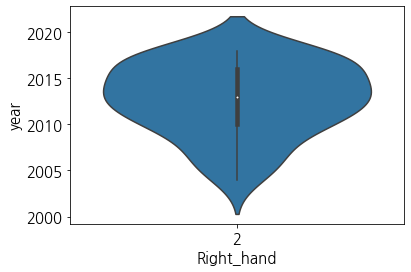

In [54]:
# 양손타자들의 등장 년도 분포 확인
plt.rc('font', size=15)
sns.violinplot(y = data_both['year'], x = data_both['Right_hand'])

아니였다. 양손타자들은 꾸준히, 그 중에서도 최근 5년 전 가장 많이 등장해 왔다. 이로서 과거의 낮은 물가로 인해 연봉이 낮게 책정되었다는 가설은 거짓으로 판명되었다.

---
## 6. 좌타자, 우타자들의 1루타 횟수 비교(1B)
좌타자는 우타자에 비해 1루에 1걸음~1걸음 반정도 가깝고, 스윙 궤적도 우타자와는 반대로 1루쪽으로 몸이 돌아가, 타격 시 1루 진루에 유리하다는 속설이 있다. 이를 검증해 보자. 

In [56]:
data_1b = data.groupby(['Right_hand'], as_index=False).mean() #좌타,우타 양타별 1루타 횟수 평균내기
data_1b['1B']

0    52.126400
1    42.538893
2    21.731707
Name: 1B, dtype: float64

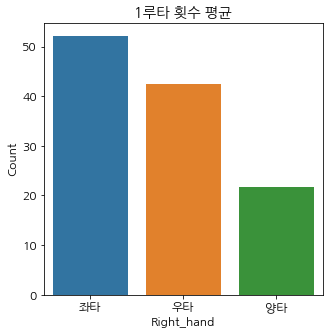

In [58]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  data_1b["1B"])
plt.title('1루타 횟수 평균')
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()

좌타자의 경우 평균 1루타 횟수 52회, 우타자의 경우 평균 1루타 횟수 43회로 좌타자가 우타자에 비해 1루타 횟수가 훨씬 많은 것을 알 수 있었다. 이로서 좌타자가 우타자에 비해 1루 진출에 유리하다는 가설은 참이다.

---
## 7. 귀무가설 검증 T - test 해보기

- 귀무가설(H0) : 좌타자들이 우타자들에 비해 1루 진루를 더 못할 것이다.(좌타자 1B검정통계량 값 <우타자 1B검정통계량값)



- 대립가설(H1) : 좌타자들이 우타자에들에 비해 1루 진루를 더 잘할 것이다.

### 7-1. 좌타자, 우타자 1루타 데이터 어레이 형태로 만들기

In [59]:
#필요한 컬럼만 가져오기
data_hand_1b = data[['Right_hand','1B']]
data_hand_1b

,Right_hand,1B
0,1,5.0
1,1,8.0
2,1,20.0
3,1,23.0
4,1,3.0
...,...,...
1908,1,93.0
1909,0,44.0
1910,0,1.0
1911,1,57.0


In [61]:
#조건식 만들어서, 좌타자, 우타자 따로따로 어레이 형태로 변경하기
condition_left = (data_hand_1b.Right_hand == 0)
condition_right = (data_hand_1b.Right_hand == 1)

In [62]:
#좌타자 어레이 만들기
data_left = data_hand_1b[condition_left]

left_input = []
for i in data_left['1B']:
    left_input.append(i)
len(left_input)

625

In [63]:
#우타자 어레이 만들기
data_right = data_hand_1b[condition_right]

right_input = []
for i in data_right['1B']:
    right_input.append(i)
len(right_input)

1247

### 7-2. 두 개의 독립적인 점수 표본의 평균에 대한 T-검정을 계산하는 라이브러리 scipy 사용

이 메서드는 2개의 독립 표본이 동일한 평균(예상) 값을 갖는다는 귀무 가설에 대한 검정입니다. 이 검정은 기본적으로 모집단의 분산이 동일하다고 가정합니다.

#### 유의확률 pvalue 해석방식
pvalue 뜻 : 확률분포와 확률분포의 표본값 1개가 주어졌을 때 그 확률분포에서 해당 표본값 혹은 더 희귀한(rare) 값이 나올 수 있는 확률

유의확률의 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리(tail)부분에 해당하는 영역의 면적

유의확률이 작다는 말은 귀무가설이 맞다는 가정하에 현재의 검정통계량값이 나올 가능성이 매우 적다는 의미 - 즉 현재의 가설(귀무)가 틀릴 가능성이 높다는 뜻!


#### 본 메서드의 귀무가설 : 첫번째 인풋의 검정통계량이 두번째 인풋의 검정통계량보다 크지않다.

- pvalue < 0.05 : 유의확률이 기준값 보다 낮음 - 귀무가설이 기각되고 대립가설 채택
- pvalue > 0.05 : 유의확률이 기준값 보다 높음 - 귀무가설이 채택


In [64]:
import scipy
scipy.stats.ttest_ind(left_input, right_input, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='greater', trim=0)

Ttest_indResult(statistic=5.324940720146317, pvalue=5.658070867474073e-08)

pvalue가 0.000000310955968495109이므로 pvalue < 0.05 이기때문에, 귀무가설이 기각되고 대립가설이 채택된다.

따라서, 귀무가설 - '좌타자들 1루타 횟수의 평균 통계값이 우타자들 1루타 횟수의 평균 통계값보다 크지 않다' 는 기각되고, 대립가설 '좌타자들 1루타 횟수의 평균 통계값이 우타자들 1루타 횟수의 평균 통계값보다 크다'가 채택된다.

즉, 통계적으로 좌타자들이 우타자들에 비해 1루타를 많이 치고, 이는 진루를 더 잘한다는 것을 말해준다.

---
## 8. 1루타율 확인해 보기
전체 타석 중 1루타를 몇번을 쳤는가?(이렇게 해도 되려나)

1루타율(1B%) = 1루타 횟수(1B)/타석수(AB)

In [65]:
#필요 컬럼  right_hand, 1B, AB만 추출
data_1br = data[['Right_hand', '1B', 'AB']]
data_1br['1B%'] = data['1B']/data['AB']
data_1br

/tmp/ipykernel_13/2971975511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1br['1B%'] = data['1B']/data['AB']


,Right_hand,1B,AB,1B%
0,1,5.0,52.0,0.096154
1,1,8.0,79.0,0.101266
2,1,20.0,154.0,0.129870
3,1,23.0,174.0,0.132184
4,1,3.0,17.0,0.176471
...,...,...,...,...
1908,1,93.0,479.0,0.194154
1909,0,44.0,191.0,0.230366
1910,0,1.0,13.0,0.076923
1911,1,57.0,279.0,0.204301


In [66]:
# 타자 종류별로 그룹화한 뒤 평균 내보기
data_1br = data_1br.groupby(['Right_hand'], as_index=False).mean() #좌타,우타 양타별 1루타율 평균내기
data_1br['1B%']

0    0.188549
1    0.177324
2    0.124799
Name: 1B%, dtype: float64

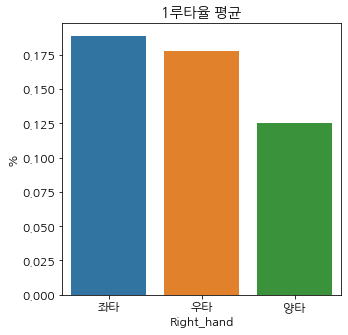

In [67]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  data_1br["1B%"])
plt.title('1루타율 평균')
plt.xlabel('Right_hand')
plt.ylabel('%')
plt.show()

1루타율을 구해보았을 때는, 좌타자가 우타자나 양타자에 비해 약 1% 가량 높았다. 타석수를 고려하니 크게 차이가 나지는 않아 보인다.  

---
## 9. 좌타자는 도루에 유리한가?  (SB = 도루성공수)
주자가 직접 베이스 진출에 성공한 횟수도 좌타자가 우타자에 비해 많을까?

In [68]:
data_sb = data.groupby(['Right_hand'], as_index=False).mean() #좌타,우타 양타별 도루 성공수 평균내기
data_sb['SB']

0    8.384000
1    4.447474
2    2.975610
Name: SB, dtype: float64

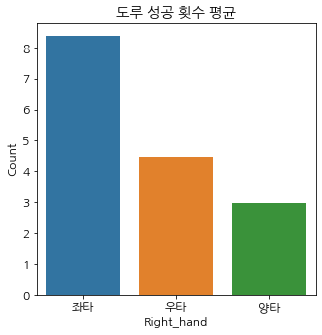

In [69]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  data_sb["SB"])
plt.title('도루 성공 횟수 평균')
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()

보다시피, 도루 성공 횟수 지표인 SB는 좌타자가 우타자에 비해 2배 이상 높았다. (최대최소 편차 5.2회 정도)

### 9-1. 도루 실패수 척도 CS도 확인해 보자

In [70]:
data_cs = data.groupby(['Right_hand'], as_index=False).mean()
data_cs['CS']

0    3.396800
1    2.172414
2    1.829268
Name: CS, dtype: float64

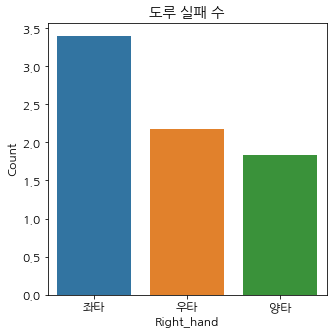

In [71]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  data_cs["CS"])
plt.title('도루 실패 수')
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()

도루 실패수 평균 또한 좌타자가 가장 많고, 우타자, 양손타자 순으로 작아졌다. 다만 성공 수에 비해 편차가 그닥 크지 않았다.(최대최소 편차 1.4회 정도) 

### 9-2. 도루  성공률 계산해보기

선수별 도루 성공률 컬럼 추가 - 도루 성공률 공식 : 도루 성공횟수/(도루 성공횟수 + 도루 실패횟수)

In [73]:
# 원 데이터에서 필요한 컬럼만 가져오기
data_sbr = data[['Right_hand','SB', 'CS']]

#도루 성공률 컬럼 SB%추가

data_sbr['SB%'] = data_sbr['SB']/(data_sbr['SB'] + data_sbr['CS'])
data_sbr

/tmp/ipykernel_13/1956153145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sbr['SB%'] = data_sbr['SB']/(data_sbr['SB'] + data_sbr['CS'])


,Right_hand,SB,CS,SB%
0,1,0.0,0.0,NaN
1,1,0.0,0.0,NaN
2,1,3.0,1.0,0.750000
3,1,2.0,1.0,0.666667
4,1,0.0,0.0,NaN
...,...,...,...,...
1908,1,2.0,1.0,0.666667
1909,0,11.0,2.0,0.846154
1910,0,0.0,1.0,0.000000
1911,1,8.0,2.0,0.800000


#### NaN값 처리하기
NaN은 주로 도루 성공횟수, 실패횟수 모두 0인 선수들 즉 시즌간 도루를 단 한번도 시도해 보지 않은 선수들을 의미한다. 처리를 어떻게 해야할까?

일단 NaN값이 얼마나 있는지 확인해 보자

In [74]:
data_sbr.isnull().sum()

Right_hand      0
SB              0
CS              0
SB%           421
dtype: int64

400명 정도의 선수가 도루를 시도하지 않았다. 일단 해당 선수들은 평균 계산에서 빼도록 하자.(더 좋은 방법 있을까? 0으로 두는 방법은 별로인가?)

In [75]:
#nan값 제거
data_sbr = data_sbr.dropna()
data_sbr.isnull().sum()

Right_hand    0
SB            0
CS            0
SB%           0
dtype: int64

In [76]:
data_sbr

,Right_hand,SB,CS,SB%
2,1,3.0,1.0,0.750000
3,1,2.0,1.0,0.666667
5,1,0.0,1.0,0.000000
8,0,1.0,1.0,0.500000
9,0,3.0,3.0,0.500000
...,...,...,...,...
1908,1,2.0,1.0,0.666667
1909,0,11.0,2.0,0.846154
1910,0,0.0,1.0,0.000000
1911,1,8.0,2.0,0.800000


In [77]:
# Right hand로 그룹핑하고, 내부에서 평균 내자
data_sbr = data_sbr.groupby(['Right_hand'], as_index=False).mean()
# hit_sbr['SB%']
data_sbr

,Right_hand,SB,CS,SB%
0,0,9.980952,4.043810,0.631311
1,1,5.900000,2.881915,0.614928
2,2,4.518519,2.777778,0.656836


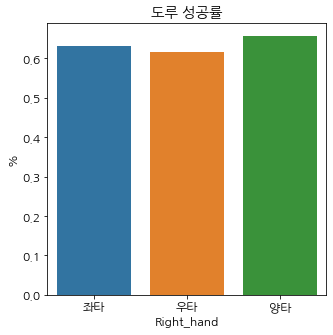

In [78]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  data_sbr["SB%"])
plt.title('도루 성공률')
plt.xlabel('Right_hand')
plt.ylabel('%')
plt.show()

Nan값 선수들을 제거해서, 기존에 파악했던 SB,CS 평균치와 약간의 차이가 발생했다.

SB% 결과를 살펴보면, 좌타자가 도루 성공률 63%로 가장 높았고, 우타자가 61%로 가장 낮았다. 큰 차이는 없는 것으로 파악된다.

---
## 10. 좌타자, 우타자의 OBP (출루율) 확인
타격을 통한 출루 + 도루 + 볼넷 + 몸에 맞는 공 등 모든 출루를 총 망라하는 지표이다. 이또한 좌타자가 더 유리할까?

In [80]:
data_obp = data.groupby(['Right_hand'], as_index=False).mean()
data_obp['OBP']

0    0.329654
1    0.314234
2    0.263154
Name: OBP, dtype: float64

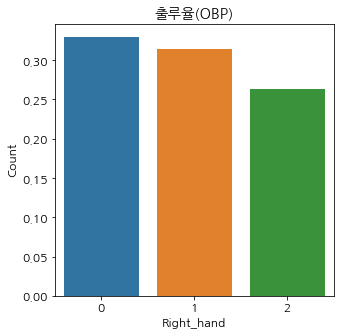

In [81]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = [0,1,2], y =  data_obp["OBP"])
plt.title("출루율(OBP)")
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()

좌타자들의 평균 출루율이 가장 높긴 했지만, 도루 지표보다는 크게 차이가 나지 않았다. 타격점수, 볼넷 등의 지표로 인해 보정이 된 듯 하다.

---
## 11.  좌타자, 우타자의 HBP (몸에 맞은 공 = 데드볼 횟수) 확인
좌타자, 우타자 중 누가 더 공에 많이 맞을까?

In [82]:
data_hbp = data.groupby(['Right_hand'], as_index=False).mean()
data_hbp['HBP']

0    3.214400
1    3.984763
2    3.902439
Name: HBP, dtype: float64

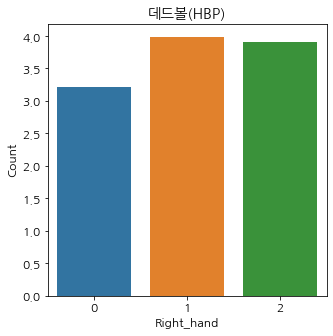

In [83]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = [0,1,2], y =  data_obp["HBP"])
plt.title("데드볼(HBP)")
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()

양손타자, 우타자가 평균적으로 데드볼을 가장 많이 맞았다. 좌타자는 비교적 데드볼 횟수가 적었다. 우투 투수들이 많아 공이 오른쪽으로 쏠리는 경향이 많고, 따라서 오른쪽 타석에 서야하는 우타자들이 공을 더 많이 맞는게 아닌가, 추측했다.

---
## [Part 4. 결론 도출]

<연봉, WAR, OPS 상관관계 분석 파트>
- 포지션 별 연봉을 확인한 결과, 포지션 별 연봉 차이가 컸다. 이에 따라 상관관계에서 포지션 별 분석이 필요하다고 판단했다.
- 연봉, WAR/OPS 지표는 직접적인 상관관계가 없다.
- 연봉 상승률 대비 WAR/OPS을 포지션으로 나눠 보았을 때 상관관계가 다소 있었다.

<좌타자 우타자 비교분석 파트>
- KBO 전체 타자들 중 좌타자는 32.7%, 우타자는 65.2%로 우타자가 좌타자에 비해 훨씬 많다.

- 좌타자와 우타자의 평균 연봉을 비교했을 때, 좌타자가 조금 더 높은 연봉을 받는다. 양손타자들은 비교적 적은 연봉을 받고 있다.

- 양손타자들은 KBO리그에서 꾸준히 존재해 왔다. 특히 2014년 경에 가장 많이 존재했다.

- 좌타자가 우타자에 비해 1루 진출이 유리하다(정량적 1루타 횟수 평균, 검정통계량 분석 결과)

- 좌타자가 우타자에 비해 도루를 훨씬 더 많이 시도한다. 다만 도루 성공률의 경우 좌타자, 우타자가 비슷하다.

- 좌타자와 우타자의 출루율(OBP)는 비슷하다. 좌타자가 근소한 차이로 더 높다.

- 데드볼의 경우 우타자가 좌타자보다 많이 맞는 경향을 보인다. (우투 투수들이 많아 오른쪽으로 공이 몰리기 때문이 아닐까 사려됨)